<a href="https://colab.research.google.com/github/Mooo49/projects/blob/main/Spam_Mail_Prediction_using_Machine_Learning_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from  sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from  sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [66]:
data=pd.read_csv('/content/mail_data.csv')

In [67]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [68]:
data.isnull().sum()

Category    0
Message     0
dtype: int64

In [69]:
data.fillna('')

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [70]:
x=data['Message']
y=data['Category']

In [71]:
encoder=LabelEncoder()
y=encoder.fit_transform(y)

In [72]:
print(encoder.classes_)

['ham' 'spam']


In [73]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [74]:
# Create an instance of TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit the vectorizer on the raw documents
vectorizer.fit(x)

# Transform the raw documents into TF-IDF features
x = vectorizer.transform(x)

In [75]:
print(x)

  (0, 8544)	0.22081883351949952
  (0, 8320)	0.18240101628302693
  (0, 8080)	0.2300034410835773
  (0, 7690)	0.15550627816331297
  (0, 5954)	0.25533539230157154
  (0, 5567)	0.156366230319576
  (0, 4497)	0.2757872678027423
  (0, 4370)	0.32645117023873077
  (0, 4110)	0.10707657674366398
  (0, 3651)	0.1803318063070826
  (0, 3611)	0.15304155020494287
  (0, 3567)	0.14786475068980162
  (0, 2334)	0.25281395947472957
  (0, 2057)	0.2757872678027423
  (0, 1763)	0.2757872678027423
  (0, 1761)	0.31163292870610654
  (0, 1313)	0.24417482890859654
  (0, 1079)	0.32645117023873077
  (1, 8446)	0.43162957585464123
  (1, 5563)	0.5466243141314314
  (1, 5534)	0.2718944069420321
  (1, 4533)	0.4083258549263009
  (1, 4338)	0.5236804332035243
  (2, 8502)	0.18684640809270722
  (2, 8459)	0.14485563808749205
  :	:
  (5570, 7095)	0.2053833705586015
  (5570, 7085)	0.1843030791950225
  (5570, 5363)	0.21007771328115263
  (5570, 4638)	0.15952002662071876
  (5570, 4241)	0.12205359146631063
  (5570, 4184)	0.282975003903785

In [76]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=.9)

In [13]:
models=[MLPClassifier(),LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),KNeighborsClassifier(),SVC()]

In [18]:
best_accuracy=0
best_model =None

for model in models:
  model=model.fit(x_train,y_train)
  predict=model.predict(x_test)
  accuracy=accuracy_score(predict,y_test)

if accuracy > best_accuracy:
    best_accuracy=accuracy
    best_model=model


In [19]:
print(best_model)
print(best_accuracy)

SVC()
0.974910394265233


In [24]:

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# تحديد النموذج واستخدام Grid search للبحث عن أفضل معلمات
model = SVC()
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# الحصول على أفضل معلمات النموذج وتقييمه
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
accuracy = best_model.score(x_test, y_test)

# عرض أفضل معلمات النموذج والدقة
print("Best Parameters:", best_params)
print("Accuracy:", accuracy)

Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 0.985663082437276


In [77]:
best_model=SVC(C= 1, gamma= 'scale', kernel= 'linear').fit(x_train,y_train)



In [78]:
train_predict=best_model.predict(x_train)
print('the accuracy on training data= ',accuracy_score(train_predict,y_train))

the accuracy on training data=  0.9966094934184284


In [79]:
test_predict=best_model.predict(x_test)
print('the accuracy on testing data= ',accuracy_score(test_predict,y_test))

the accuracy on testing data=  0.982078853046595


<ipython-input-80-06aa208abd8a>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1= sns.distplot(test_predict, hist=False, color="r", label="Actual Value")
<ipython-input-80-06aa208abd8a>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, hist=False, color="b", label="Fitted Values"

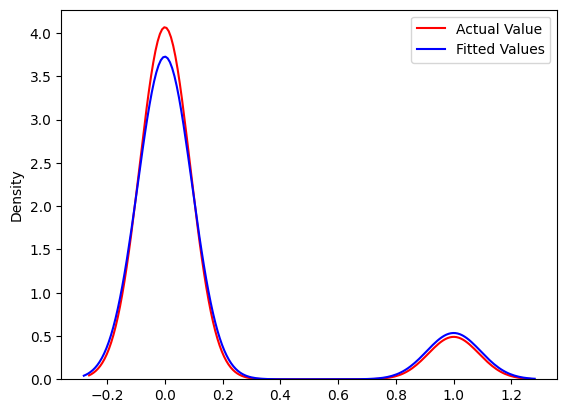

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

ax1= sns.distplot(test_predict, hist=False, color="r", label="Actual Value")
sns.distplot(y_test, hist=False, color="b", label="Fitted Values", ax=ax1)

plt.legend()
plt.show()

In [84]:
input_mail = ['WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.']
# convert text to feature vectors
input_data_features = vectorizer.transform(input_mail)

# making prediction

prediction = best_model.predict(input_data_features)
print(prediction)


if (prediction[0]==0):
  print('Ham mail')

else:
  print('Spam mail')



[1]
Spam mail
